In [4]:
#Name - Sobhan Maity
#Roll No - 10060921009
#M.Tech
#Department of Information Technology(AI) 

In [5]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [6]:
fuel_data = pd.read_csv("FuelConsumptionCo2.csv")

In [7]:
fuel_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
fuel_data.shape

(1067, 13)

In [9]:
fuel_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
cfuel_data = fuel_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [11]:
cfuel_data.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [12]:
viz = cfuel_data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160400D4130>,
      dtype=object)

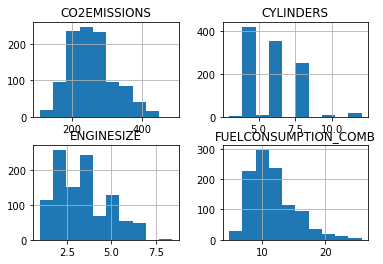

In [13]:
viz.hist()

In [14]:
plt.show()

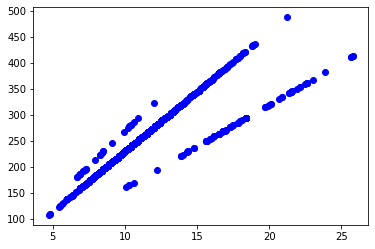

In [15]:
plt.scatter(cfuel_data.FUELCONSUMPTION_COMB, cfuel_data.CO2EMISSIONS, color = 'blue')

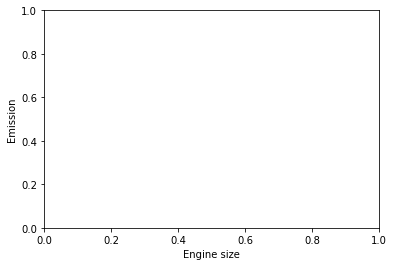

In [16]:
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
msk = np.random.rand(len(fuel_data))<0.8

In [18]:
train = cfuel_data[msk]

In [19]:
test = cfuel_data[msk]

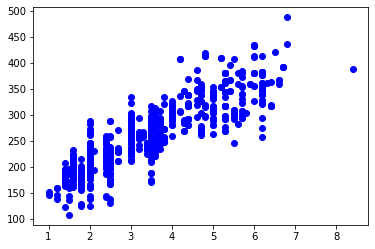

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

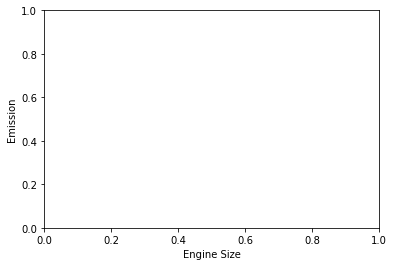

In [20]:
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [20]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

LinearRegression()

In [21]:
print('Coefficients: ', regr.coef_)

Coefficients:  [[39.31077349]]


In [22]:
print('Intercept: ', regr.intercept_)

Intercept:  [123.85413607]


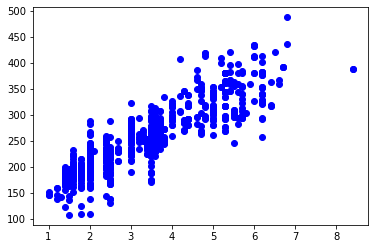

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')

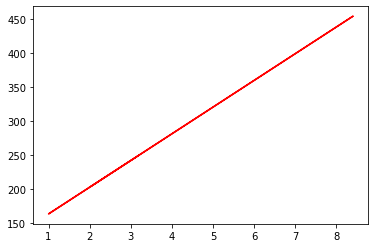

In [24]:
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

Text(0, 0.5, 'Emission')

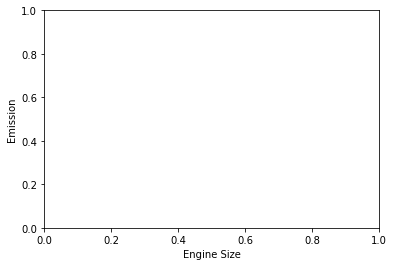

In [25]:
plt.xlabel("Engine Size")
plt.ylabel("Emission")

In [26]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [27]:
print("Mean Absolute Error: %.2f"%np.mean(np.absolute(test_y_-test_y)))

Mean Absolute Error: 22.94


In [28]:
print("Residual Sum of Squares (MSE): %.2f"%np.mean((test_y_-test_y)**2))

Residual Sum of Squares (MSE): 917.04


In [29]:
print("R2-Score: %.2f"%r2_score(test_y, test_y_))

R2-Score: 0.77
